In [1]:
!pip install yfinance

In [15]:
import yfinance as yf
print("yfinance imported successfully!")
!pip install --upgrade yfinance



yfinance imported successfully!


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


C:\Users\DEEPANSHI\AppData\Local\Temp\ipykernel_9056\2093443837.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


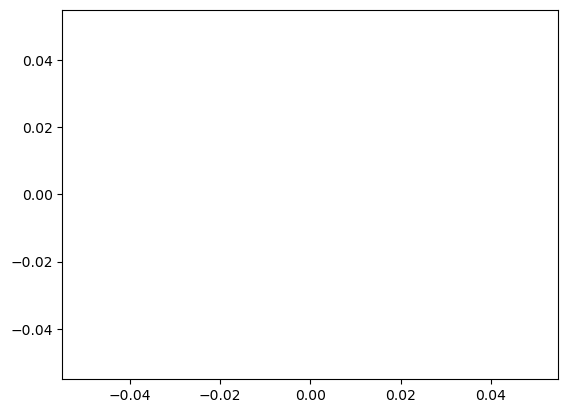

In [17]:
#application is based on close column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start="2015-01-01"
end="2024-12-31"
df = yf.download('AAPL', start=start, end=end)
df=df.reset_index()
df=df.drop(['Date'],axis=1)
print(df.head())
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

In [ ]:
#spliting data into trainig and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])#70%
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])#30%
print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()

In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train shape:", x_train.shape)  # Should be (samples, time_steps, 1)

In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow



In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

print("Keras imported successfully!")

In [ ]:
#ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
print("x_train shape:", x_train.shape)  # Should be (samples, time_steps, 1)
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

In [ ]:
model.save('keras_model.h5',save_format="h5")

In [ ]:
past_100_days=data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data.shape

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("x_test shape:", x_test.shape)  # Should be (samples, time_steps, 1)
print("y_test shape:", y_test.shape)  # Should be (samples,)

In [ ]:
y_predicted=model.predict(x_test)
print(y_predicted.shape)

In [ ]:
scaler.scale_

In [ ]:
scaler_factor=1/0.00739093
y_predicted=y_predicted*scaler_factor
y_test=y_test*scaler_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()